# ggplot2

The `ggplot2` package helps you plot graphics with a `grammar`. The grammar provides a way to talk about parts of a plot. The grammar talks about the following `components` of a plot.

* `data` is what is being plotted
* `geometric objects` are the shapes and lines that appear on the plot
* `aesthetics` are the appearance of the geometric objects and the mapping of variables to such aesthetics
* `position adjustment` is the placement of elements
* `scale` is the range of values for each aesthetic mapping
* `coordinate system` is used to organize the geometric objects
* `facets` are groupos of data shown in differen plots

## Geometries

### geom_point

The `geom_point` is used for drawing individual points.

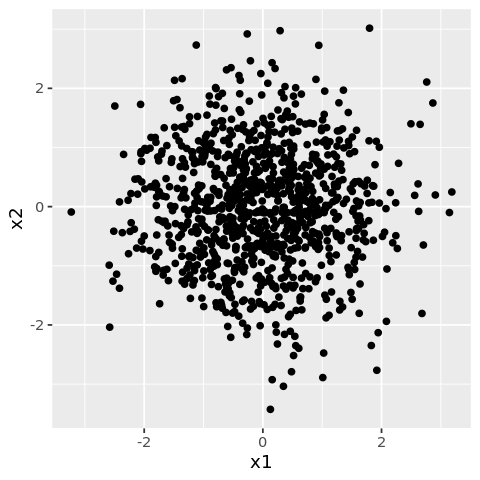

In [1]:
library('ggplot2')
library('repr')

df <- data.frame(
    x1 = rnorm(1000),
    x2 = rnorm(1000)
)

options(repr.plot.width=4, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2))

You may also style with the `color` attribute.

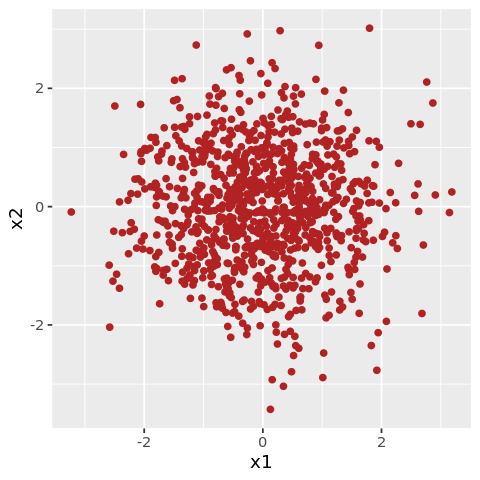

In [2]:
options(repr.plot.width=4, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2), color='firebrick')

You may also style with themes.

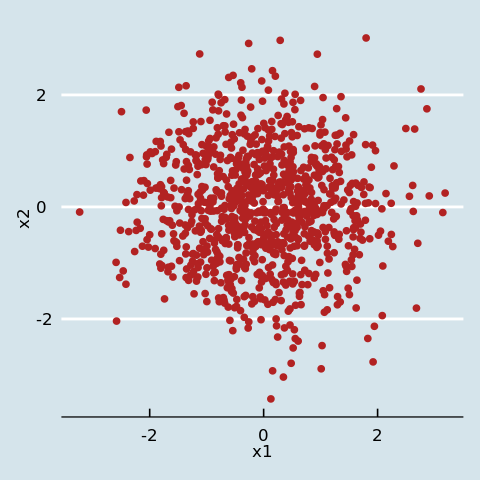

In [3]:
library('ggthemes')

options(repr.plot.width=4, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2), color='firebrick') +
    theme_economist()

### geom_hex

The `geom_hex` function is used for drawing individual points as hexagons.

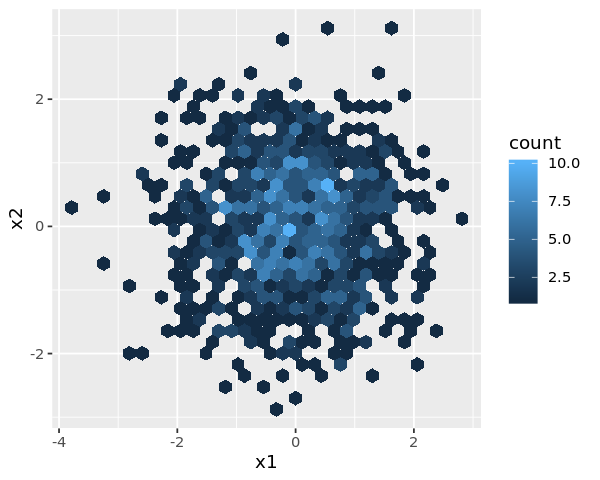

In [4]:
df <- data.frame(
    x1 = rnorm(1000),
    x2 = rnorm(1000)
)

options(repr.plot.width=5, repr.plot.height=4)

ggplot(df) +
    geom_hex(mapping=aes(x=x1, y=x2))

### geom_line

The `geom_line` function is used for drawing lines.

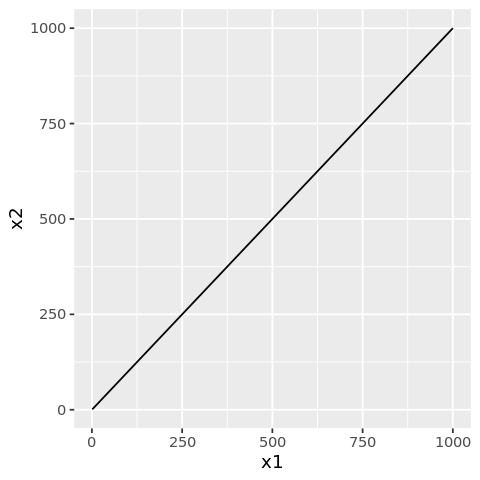

In [5]:
df <- data.frame(
    x1 = seq(1, 1000),
    x2 = seq(1, 1000)
)

options(repr.plot.width=4, repr.plot.height=4)

ggplot(df) +
    geom_line(mapping=aes(x=x1, y=x2))

### geom_smooth

The `geom_smooth` function is used to draw a smoothed line.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


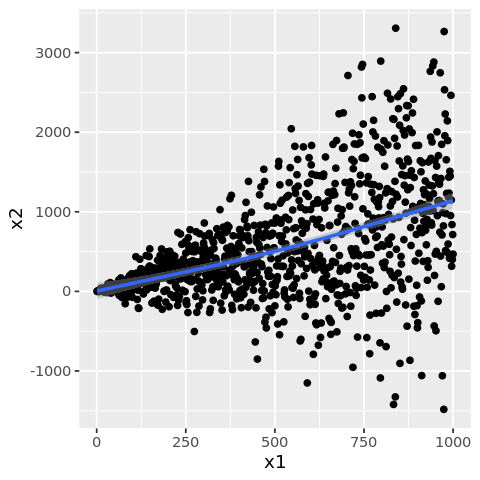

In [6]:
df <- data.frame(
    x1 = seq(1, 1000),
    x2 = seq(1, 1000) + (rnorm(1000) * seq(1, 1000))
)

options(repr.plot.width=4, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2)) +
    geom_smooth(mapping=aes(x=x1, y=x2))

### geom_col

The `geom_col` function is used to draw bars.

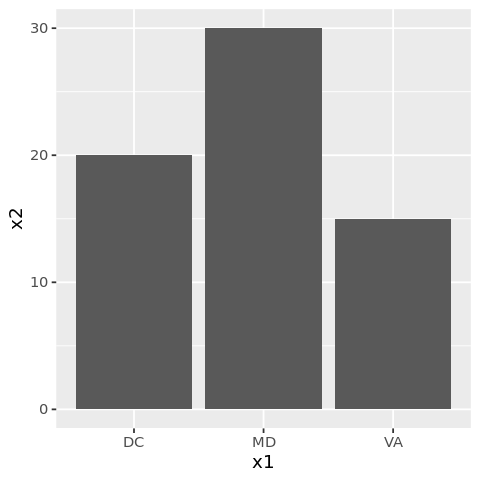

In [7]:
df <- data.frame(
    x1 = c('DC', 'MD', 'VA'),
    x2 = c(20, 30, 15)
)

options(repr.plot.width=4, repr.plot.height=4)

ggplot(df) +
    geom_col(mapping=aes(x=x1, y=x2))

### geom_boxplot

Use `geom_boxplot` to plot box-whisker plots.

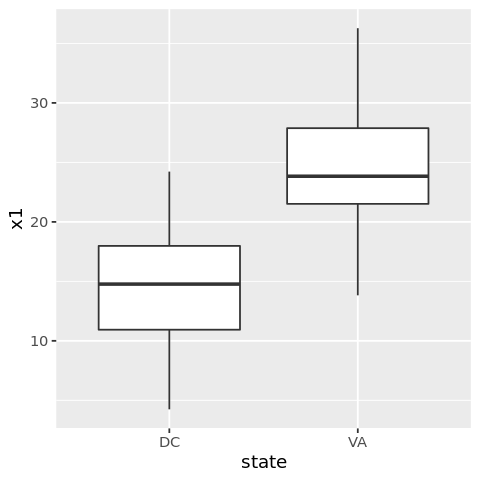

In [8]:
df <- data.frame(
    x1 = c(rnorm(100, mean=15, sd=5), rnorm(100, mean=25, sd=5)),
    x2 = c(rnorm(100, mean=15, sd=5), rnorm(100, mean=25, sd=5)),
    state = c(rep('DC', 100), rep('VA', 100))
)

options(repr.plot.width=4, repr.plot.height=4)

ggplot(df) +
    geom_boxplot(mapping=aes(x=state, y=x1))

You may play around with attributes to change the look and feel of the box-whisker plot.

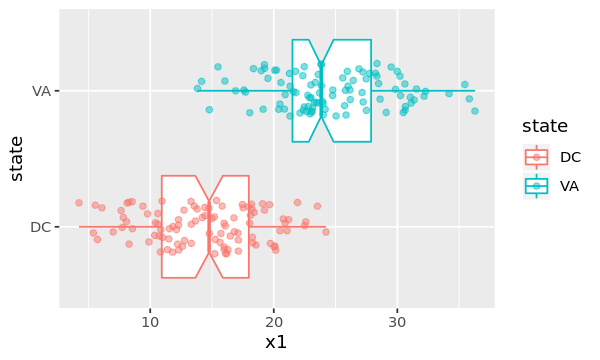

In [9]:
options(repr.plot.width=5, repr.plot.height=3)

ggplot(df, mapping=aes(x=state, y=x1, color=state)) +
    geom_boxplot( 
                 outlier.colour='green', 
                 outlier.shape=8, 
                 notch=TRUE
                ) +
    coord_flip() +
    geom_jitter(alpha=0.5, position=position_jitter(width=0.2))

### geom_tile

Use `geom_tile` to build correlation matrix plots.

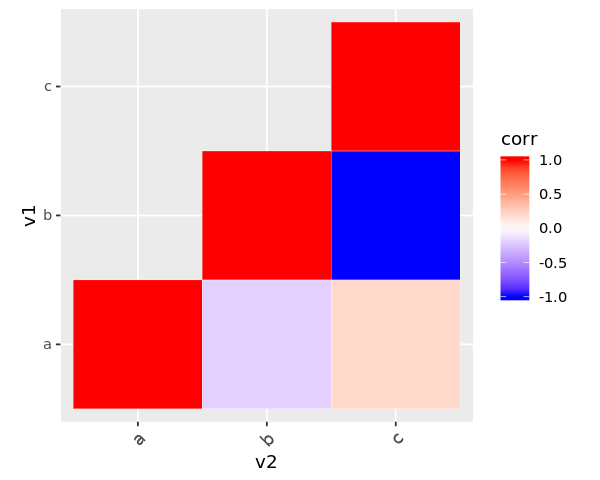

In [10]:
df <- data.frame(
    v1 = c('a', 'a', 'a', 'b', 'b', 'c'),
    v2 = c('a', 'b', 'c', 'b', 'c', 'c'),
    corr = c(1.0, -0.2, 0.2, 1.0, -1.0, 1.0)
)

options(repr.plot.width=5, repr.plot.height=4)

ggplot(df, mapping=aes(x=v2, y=v1)) +
    geom_tile(data=df, aes(fill=corr), color='white') +
    scale_fill_gradient2(low='blue', high='red', mid='white', midpoint=0, limit=c(-1, 1)) +
    theme(axis.text.x=element_text(angle=45, vjust=1, size=11, hjust=1)) +
    coord_equal()

## Aesthetic mapping

Aesthetics may be used to change colors.

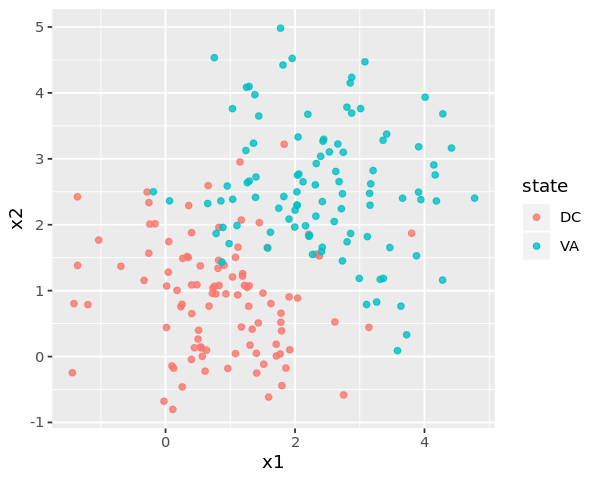

In [11]:
df <- data.frame(
    x1 = c(rnorm(100, mean=1, sd=1), rnorm(100, mean=2.5, sd=1)),
    x2 = c(rnorm(100, mean=1, sd=1), rnorm(100, mean=2.5, sd=1)),
    state = c(rep('DC', 100), rep('VA', 100))
)

options(repr.plot.width=5, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2, color=state), alpha=0.8)

## Position

Positioning can change the placement of elements and produce different types of plots.

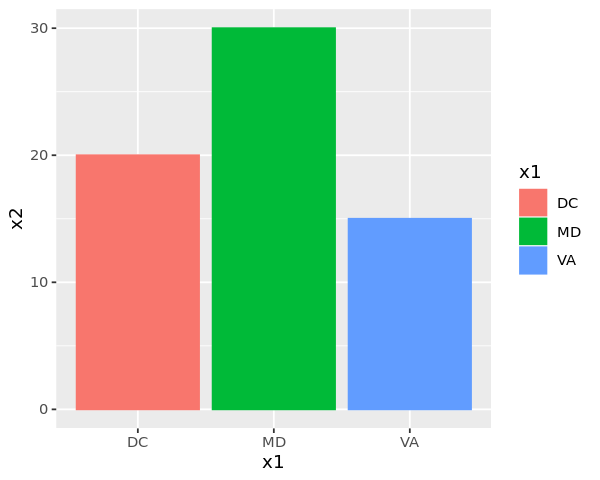

In [12]:
df <- data.frame(
    x1 = c('DC', 'MD', 'VA'),
    x2 = c(20, 30, 15)
)

options(repr.plot.width=5, repr.plot.height=4)

ggplot(df) +
    geom_col(mapping=aes(x=x1, y=x2, color=x1, fill=x1))

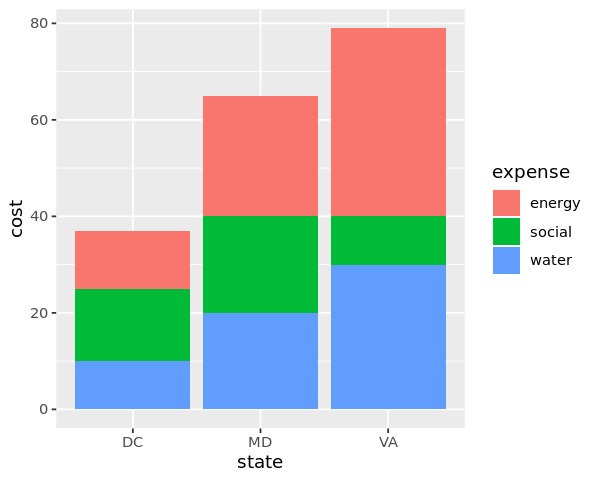

In [13]:
library('tidyr')

df <- data.frame(
    state = c('DC', 'MD', 'VA'),
    water = c(10, 20, 30),
    energy = c(12, 25, 39),
    social = c(15, 20, 10)
)

n <- df %>%
        pivot_longer(-state, names_to='expense', values_to='cost')

options(repr.plot.width=5, repr.plot.height=4)

ggplot(n) + 
    geom_col(mapping=aes(x=state, y=cost, fill=expense))

When `position='fill'`, the stacked bars are forced to 100%.

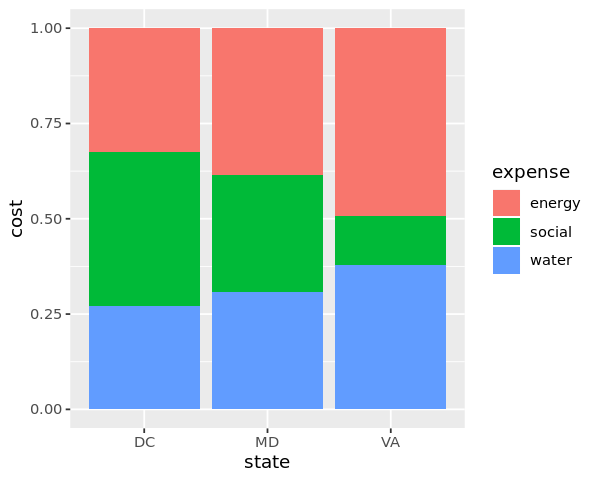

In [14]:
options(repr.plot.width=5, repr.plot.height=4)

ggplot(n) + 
    geom_col(mapping=aes(x=state, y=cost, fill=expense), position='fill')

When `position='dodge` the bars are side-by-side.

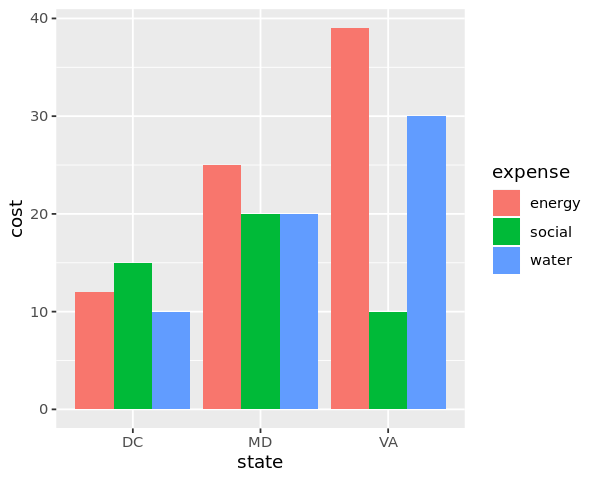

In [15]:
options(repr.plot.width=5, repr.plot.height=4)

ggplot(n) + 
    geom_col(mapping=aes(x=state, y=cost, fill=expense), position='dodge')

## Scale

Scaling may help to zoom in or out of the plot, as well as rescale the axes.

In [16]:
df <- data.frame(
    x1 = c(rnorm(100, mean=10, sd=1), rnorm(100, mean=25, sd=1)),
    x2 = c(rnorm(100, mean=10, sd=1), rnorm(100, mean=25, sd=1)),
    state = c(rep('DC', 100), rep('VA', 100))
)

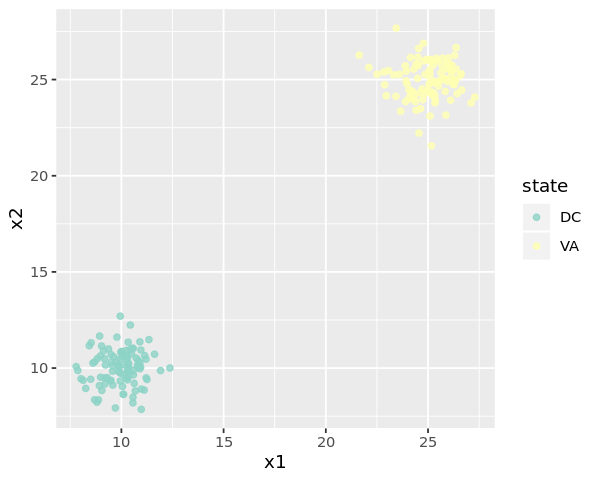

In [17]:
options(repr.plot.width=5, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2, color=state), alpha=0.8) +
    scale_color_brewer(palette='Set3') +
    scale_x_continuous() +
    scale_y_continuous()

Warning message:
“Removed 100 rows containing missing values (geom_point).”

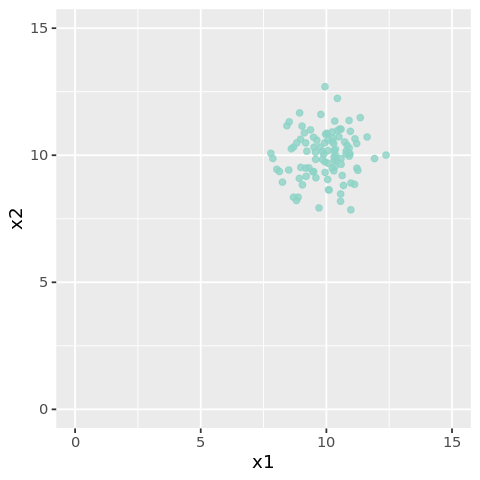

In [18]:
options(repr.plot.width=4, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2, color=state), alpha=0.8) +
    scale_color_brewer(palette='Set3') +
    scale_x_continuous(limits=c(0, 15)) +
    scale_y_continuous(limits=c(0, 15)) +
    theme(legend.position='none')

Warning message:
“Removed 100 rows containing missing values (geom_point).”

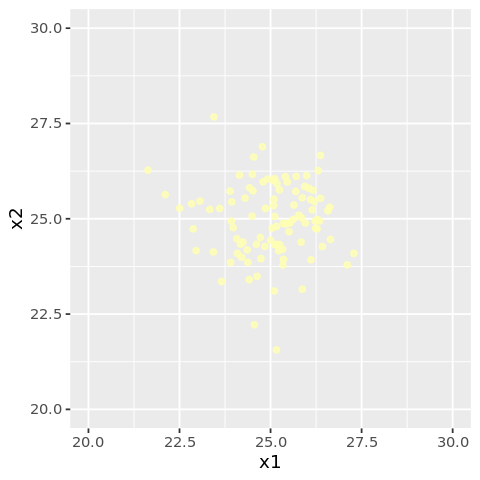

In [19]:
options(repr.plot.width=4, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2, color=state), alpha=0.8) +
    scale_color_brewer(palette='Set3') +
    scale_x_continuous(limits=c(20, 30)) +
    scale_y_continuous(limits=c(20, 30)) +
    theme(legend.position='none')

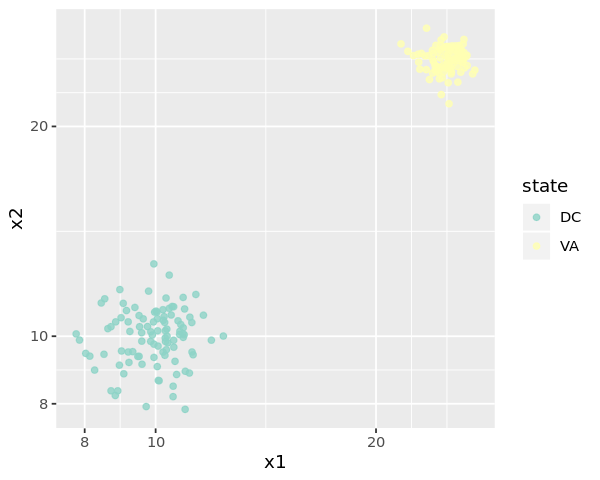

In [20]:
options(repr.plot.width=5, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2, color=state), alpha=0.8) +
    scale_color_brewer(palette='Set3') +
    scale_x_log10() +
    scale_y_log10()

## Coordinate

Coordinate functions such as `coord_flip` and `coord_polar` can change the type and look of a plot.

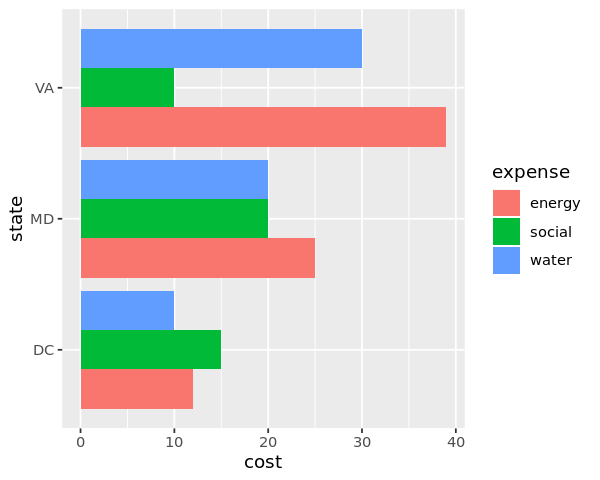

In [21]:
df <- data.frame(
    state = c('DC', 'MD', 'VA'),
    water = c(10, 20, 30),
    energy = c(12, 25, 39),
    social = c(15, 20, 10)
)

n <- df %>%
        pivot_longer(-state, names_to='expense', values_to='cost')

options(repr.plot.width=5, repr.plot.height=4)

ggplot(n) + 
    geom_col(mapping=aes(x=state, y=cost, fill=expense), position='dodge') +
    coord_flip()

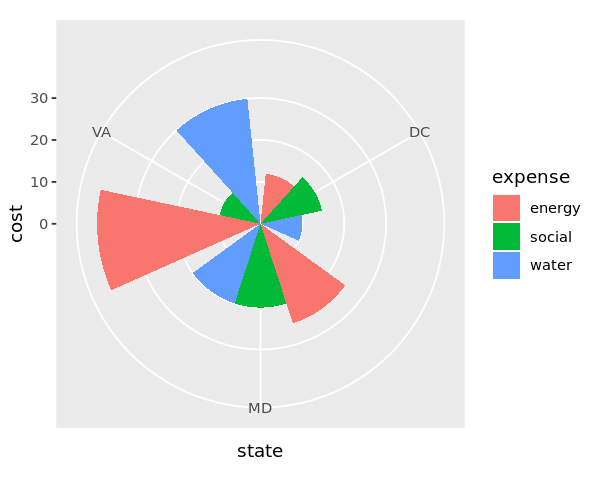

In [22]:
options(repr.plot.width=5, repr.plot.height=4)

ggplot(n) + 
    geom_col(mapping=aes(x=state, y=cost, fill=expense), position='dodge') +
    coord_polar()

## Facets

Facets can create subplots.

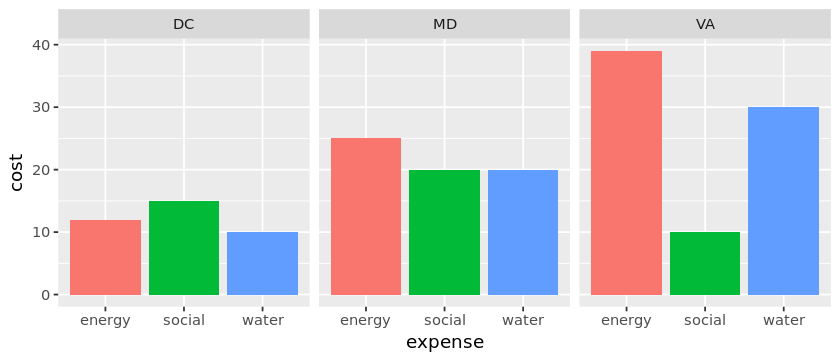

In [23]:
df <- data.frame(
    state = c('DC', 'MD', 'VA'),
    water = c(10, 20, 30),
    energy = c(12, 25, 39),
    social = c(15, 20, 10)
)

n <- df %>%
        pivot_longer(-state, names_to='expense', values_to='cost')

options(repr.plot.width=7, repr.plot.height=3)

ggplot(n) + 
    geom_col(mapping=aes(x=expense, y=cost, fill=expense)) +
    facet_wrap(~state) +
    theme(legend.position='none')

## Labels and annotations

You may modify the title, axes and legend with `labs`. You may use `geom_label_repel` from the `ggrepel` library to annotate specific coordinates.

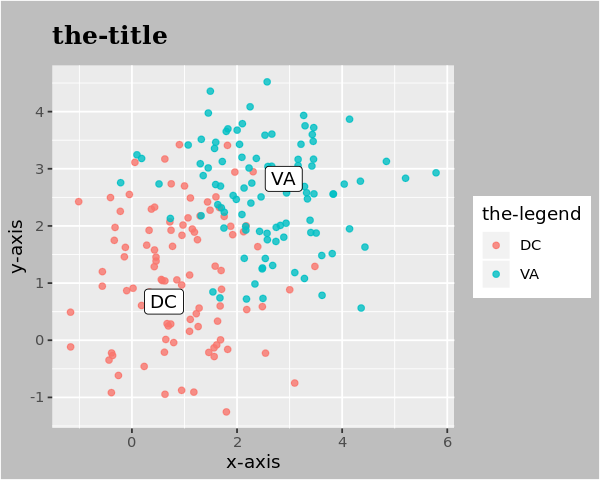

In [24]:
library('ggrepel')

df <- data.frame(
    x1 = c(rnorm(100, mean=1, sd=1), rnorm(100, mean=2.5, sd=1)),
    x2 = c(rnorm(100, mean=1, sd=1), rnorm(100, mean=2.5, sd=1)),
    state = c(rep('DC', 100), rep('VA', 100))
)

centers <- data.frame(
    x1 = c(1.0, 2.5),
    x2 = c(1.0, 2.5),
    state = c('DC', 'VA')
)

options(repr.plot.width=5, repr.plot.height=4)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2, color=state), alpha=0.8) +
    geom_label_repel(data=centers, mapping=aes(x=x1, y=x2, label=state)) +
    labs(
        title ='the-title',
        x='x-axis',
        y='y-axis',
        color='the-legend'
    ) +
    theme(
        plot.title=element_text(
            size=15, 
            face='bold', 
            margin=margin(10, 0, 10, 0), 
            vjust=1,
            family='Times'
        ),
        plot.background=element_rect(fill='grey')
    )

## Choropleth map

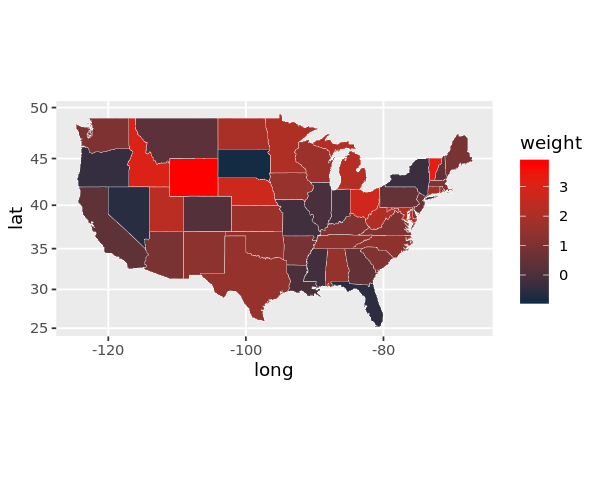

In [25]:
suppressMessages({
    library('dplyr')
})

allStates <- unique(map_data('state')$region)
x <- rnorm(length(allStates), mean=1, sd=1)

randomData <- data.frame(
    region=allStates,
    weight=x,
    stringsAsFactors=FALSE
)

df <- randomData %>%
    left_join(map_data('state'), by='region')

ggplot(df) +
    geom_polygon(
        mapping=aes(x=long, y=lat, group=group, fill=weight),
        color='white',
        size=0.1
    ) +
    coord_map() +
    scale_fill_continuous(low='#132B43', high='Red')

## Subplots

Use the `grid` package.

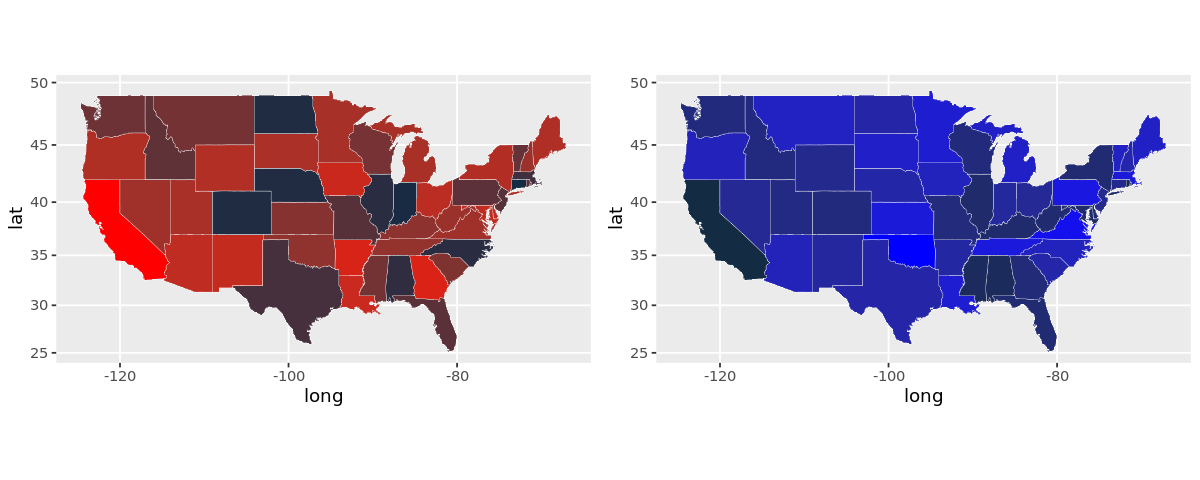

In [26]:
suppressMessages({
    library('grid')
    library('gridExtra')
})


allStates <- unique(map_data('state')$region)

randomData1 <- data.frame(
    region=allStates,
    weight=rnorm(length(allStates), mean=1, sd=1),
    stringsAsFactors=FALSE
)

randomData2 <- data.frame(
    region=allStates,
    weight=rnorm(length(allStates), mean=10, sd=2),
    stringsAsFactors=FALSE
)

df1 <- randomData1 %>%
    left_join(map_data('state'), by='region')
df2 <- randomData2 %>%
    left_join(map_data('state'), by='region')

plt1 <- ggplot(df1) +
            geom_polygon(
                mapping=aes(x=long, y=lat, group=group, fill=weight),
                color='white',
                size=0.1
            ) +
            coord_map() +
            scale_fill_continuous(low='#132B43', high='Red') +
            theme(legend.position='none')

plt2 <- ggplot(df2) +
            geom_polygon(
                mapping=aes(x=long, y=lat, group=group, fill=weight),
                color='white',
                size=0.1
            ) +
            coord_map() +
            scale_fill_continuous(low='#132B43', high='Blue') +
            theme(legend.position='none')

options(repr.plot.width=10, repr.plot.height=4)

grid.arrange(plt1, plt2, ncol=2)